<a href="https://colab.research.google.com/github/fabian692/redes-neuronales-tesis/blob/main/red_neuronal_funcion_ver_Enero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#pip install tensorflow-gpu

In [ ]:
import tensorflow as tf
import keras
import sklearn
from keras.optimizers import *
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.optimizers import *
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from sklearn import metrics
%matplotlib inline 
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score, auc
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder

In [ ]:
cid1= pd.read_csv("/content/drive/My Drive/Colab Notebooks/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
cid2 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
cid3 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
cid4 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
cid5 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
cid6 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
cid7 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
cid8 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")


In [ ]:
cid1.rename({' Label': 'Label'}, axis=1,inplace=True)
cid2.rename({' Label': 'Label'}, axis=1,inplace=True)
cid3.rename({' Label': 'Label'}, axis=1,inplace=True)
cid4.rename({' Label': 'Label'}, axis=1,inplace=True)
cid5.rename({' Label': 'Label'}, axis=1,inplace=True)
cid6.rename({' Label': 'Label'}, axis=1,inplace=True)
cid7.rename({' Label': 'Label'}, axis=1,inplace=True)
cid8.rename({' Label': 'Label'}, axis=1,inplace=True)

In [ ]:
cid2=cid2[cid2.Label == 'BENIGN']
cid3=cid3[cid3.Label == 'BENIGN']
cid5=cid5[cid5.Label == 'BENIGN']
cid6=cid6[cid6.Label == 'BENIGN']
cid7=cid7[cid7.Label == 'BENIGN']
cid8=cid8[cid8.Label != 'Heartbleed']
cicids= pd.concat([cid1,cid2,cid3,cid4,cid5,cid6,cid7,cid8])

In [ ]:
cicids.shape

(2653785, 79)

In [ ]:
cicids.groupby('Label').size()

Label
BENIGN              2273097
DDoS                 128027
DoS GoldenEye         10293
DoS Hulk             231073
DoS Slowhttptest       5499
DoS slowloris          5796
dtype: int64

In [ ]:
cicids = cicids.drop([' Fwd Header Length.1'], axis=1)
cicids.columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label']

In [ ]:
cicids.shape

(2653785, 78)

In [ ]:
cicids['Label'].unique()

array(['BENIGN', 'DDoS', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye'], dtype=object)

#datos con limpieza de protocolos

In [ ]:
cid12= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/slowlorisgo.csv")
cid12=cid12.assign(Label="DoS slowloris")
cid12=cid12.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid13= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/goldenmod.csv")
cid13=cid13.assign(Label="DoS GoldenEye")
cid13=cid13.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid14= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/hoicgenericboost.csv")
cid14=cid14.assign(Label="DDoS")
cid14=cid14.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid15= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/hulkgo (1).csv")
cid15=cid15.assign(Label="DoS Hulk")
cid15=cid15.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid16= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/loichttp.csv")
cid16=cid16.assign(Label="DDoS")
cid16=cid16.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid17= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/loictcp.csv")
cid17=cid17.assign(Label="DDoS")
cid17=cid17.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid18= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/loictcp1.csv")
cid18=cid18.assign(Label="DDoS")
cid18=cid18.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid19= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/loicudp.csv")
cid19=cid19.assign(Label="DDoS")
cid19=cid19.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid20= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/slowhttptest.csv")
cid20=cid20.assign(Label="DoS Slowhttptest")
cid20=cid20.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid21= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/slowlorisgo.csv")
cid21=cid21.assign(Label="DoS slowloris")
cid21=cid21.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
#
cid30=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221212-103552.pcap.csv")
cid30=cid30.assign(Label="BENIGN")
cid30=cid30.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid31=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221212-150634.pcap.csv")
cid31=cid31.assign(Label="BENIGN")
cid31=cid31.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid32=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221212-154833.pcap.csv")
cid32=cid32.assign(Label="BENIGN")
cid32=cid32.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid33=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221227-175005.pcap.csv")
cid33=cid33.assign(Label="BENIGN")
cid33=cid33.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid34=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/benignonuevacaptura.csv")
cid34=cid34.assign(Label="BENIGN")
cid34=cid34.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])

#
cicids=pd.concat([cicids,cid12,cid13,cid14,cid15,cid16,cid17,cid18,cid19,cid20,cid21,cid30,cid31,cid32,cid33,cid34])
cicids=cicids.sort_values('Label')

#datos sin limpieza de protocolos

In [ ]:
cid12= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/DDOS (1).csv")
cid12=cid12.assign(Label="DDoS")
cid12=cid12.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid13=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/Doshulk (1).csv")
cid13=cid13.assign(Label="DoS Hulk")
cid13=cid13.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid14=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/Slowloris (1).csv")
cid14=cid14.assign(Label="DoS slowloris")
cid14=cid14.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid15=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/Benignos.csv")
cid15=cid15.assign(Label="BENIGN")
cid15=cid15.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid16=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/benigno.csv")
cid16=cid16.assign(Label="BENIGN")
cid16=cid16.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid17=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/GoldenE.csv")
cid17=cid17.assign(Label="DoS GoldenEye")
cid17=cid17.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid18=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/Goldeneye.csv")
cid18=cid18.assign(Label="DoS GoldenEye")
cid18=cid18.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid19=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/httptest.csv")
cid19=cid19.assign(Label="DoS Slowhttptest")
cid19=cid19.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid20=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/httptest1.csv")
cid20=cid20.assign(Label="DoS Slowhttptest")
cid20=cid20.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
#nuevos datos
cid21=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/hoicfull.csv")
cid21=cid21.assign(Label="DDoS")
cid21=cid21.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid22=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/hoicgenericb.csv")
cid22=cid22.assign(Label="DDoS")
cid22=cid22.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid23=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/hoicducht.csv")
cid23=cid23.assign(Label="DDoS")
cid23=cid23.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid24=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/hoicuserag.csv")
cid24=cid24.assign(Label="DDoS")
cid24=cid24.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid25=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/hoicvisa.csv")
cid25=cid25.assign(Label="DDoS")
cid25=cid25.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid26=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/hulkgo.csv")
cid26=cid26.assign(Label="DoS Hulk")
cid26=cid26.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid27=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/slowlorisnuevo.csv")
cid27=cid27.assign(Label="DoS slowloris")
cid27=cid27.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid28=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/dosgoldeneyegetnuevo.csv")
cid28=cid28.assign(Label="DoS GoldenEye")
cid28=cid28.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid29=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/dosgoldeneyegetnuev.csv")
cid29=cid29.assign(Label="DoS GoldenEye")
cid29=cid29.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
#nuevos datos benignos
cid30=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221212-103552.pcap.csv")
cid30=cid30.assign(Label="BENIGN")
cid30=cid30.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid31=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221212-150634.pcap.csv")
cid31=cid31.assign(Label="BENIGN")
cid31=cid31.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid32=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221212-154833.pcap.csv")
cid32=cid32.assign(Label="BENIGN")
cid32=cid32.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid33=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221227-175005.pcap.csv")
cid33=cid33.assign(Label="BENIGN")
cid33=cid33.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])
cid34=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/benignonuevacaptura.csv")
cid34=cid34.assign(Label="BENIGN")
cid34=cid34.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min','Label'])



cicids=pd.concat([cicids,cid12,cid13,cid14,cid15,cid16,cid17,cid18,cid19,cid20,cid21,cid22,cid23,cid24,cid25,cid26,cid27,cid28,cid29,cid30,cid31,cid32,cid33,cid34])
cicids=cicids.sort_values('Label')

In [ ]:
cicids = cicids.replace([np.inf,-np.inf],0)
cicids = cicids.dropna()
cicids=cicids.sort_values('Label')


In [ ]:
cicids.shape

(2965332, 78)

In [ ]:
cicids.index = np.arange(0,cicids.shape[0])

In [ ]:
cicids.groupby('Label').size()

Label
BENIGN              2287872
DDoS                 271867
DoS GoldenEye         40377
DoS Hulk             288959
DoS Slowhttptest      25781
DoS slowloris         50476
dtype: int64

In [ ]:
cicids.columns

Index(['dst_port', 'flow_duration', 'tot_fwd_pkts', 'tot_bwd_pkts',
       'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean',
       'bwd_pkt_len_std', 'flow_byts_s', 'flow_pkts_s', 'flow_iat_mean',
       'flow_iat_std', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_tot',
       'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max', 'fwd_iat_min',
       'bwd_iat_tot', 'bwd_iat_mean', 'bwd_iat_std', 'bwd_iat_max',
       'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags',
       'bwd_urg_flags', 'fwd_header_len', 'bwd_header_len', 'fwd_pkts_s',
       'bwd_pkts_s', 'pkt_len_min', 'pkt_len_max', 'pkt_len_mean',
       'pkt_len_std', 'pkt_len_var', 'fin_flag_cnt', 'syn_flag_cnt',
       'rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt', 'urg_flag_cnt',
       'cwe_flag_count', 'ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg',
       'fwd_seg_size_avg', 'bwd

In [ ]:
y = cicids['Label'].values
X = cicids.drop(['Label'], axis=1).values
df2 = cicids['Label']
feat = df2.values
etiqueta = df2.unique()
X = pd.DataFrame(normalize(X))
y = preprocessing.LabelEncoder()
Y=y.fit_transform(cicids['Label'].values)
Y1=y.inverse_transform(Y)

In [ ]:
cicids.shape

(2965332, 78)

In [ ]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, Y,train_size=0.8,test_size=0.2,random_state=42)

In [ ]:
#  Prototipo de red neuronal profunda para la detección y prevención de ataques e intrusiones; tensorflow 2.3.0
#def redneuronal(X_entrenamiento, X_prueba, y_entrenamiento, y_prueba):
from datetime import datetime
%load_ext tensorboard
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
with tf.device('/device:GPU:0'):
  tf.keras.backend.set_floatx('float64')
  modelo = tf.keras.models.Sequential([
                                      #tf.keras.layers.Dense(78,activation=tf.nn.relu),
                                      #tf.keras.layers.Dense(78,activation=tf.keras.activations.relu),
                                      
                                      #tf.keras.layers.Dense(78,activation=tf.keras.activations.relu),
                                      
                                      #tf.keras.layers.Dense(78,activation=tf.keras.activations.relu),
                                  
                                      tf.keras.layers.Dense(100,activation=tf.keras.activations.relu),
                                    
                                      tf.keras.layers.Dense(80,activation=tf.keras.activations.relu),
                                     
                                      tf.keras.layers.Dense(78,activation=tf.nn.softmax) #use_bias=True
])
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer= tf.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'), metrics=['accuracy'])
  #history = modelo.fit(X_entrenamiento,y_entrenamiento,validation_data=(X_prueba,y_prueba),batch_size=200,callbacks=[tensorboard_callback],verbose=1,epochs=20,use_multiprocessing=True)
  history = modelo.fit(X_entrenamiento,y_entrenamiento,validation_split=0.2,batch_size=400,callbacks=[tensorboard_callback],verbose=1,epochs=20,use_multiprocessing=True)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/20
4745/4745 [==============================] - 25s 5ms/step - loss: 0.1763 - accuracy: 0.9486 - val_loss: 0.0994 - val_accuracy: 0.9681
Epoch 2/20
4745/4745 [==============================] - 23s 5ms/step - loss: 0.0874 - accuracy: 0.9735 - val_loss: 0.0779 - val_accuracy: 0.9763
Epoch 3/20
4745/4745 [==============================] - 23s 5ms/step - loss: 0.0683 - accuracy: 0.9780 - val_loss: 0.0610 - val_accuracy: 0.9801
Epoch 4/20
4745/4745 [==============================] - 23s 5ms/step - loss: 0.0555 - accuracy: 0.9821 - val_loss: 0.0686 - val_accuracy: 0.9807
Epoch 5/20
4745/4745 [==============================] - 23s 5ms/step - loss: 0.0488 - accuracy: 0.9844 - val_loss: 0.0454 - val_accuracy: 0.9845
Epoch 6/20
4745/4745 [==============================] - 23s 5ms/step - loss: 0.0449 - accuracy: 0.9855 - val_loss: 0.0655 - val_accuracy: 0.9718
Epoch 7/20
4745/4745 [==================

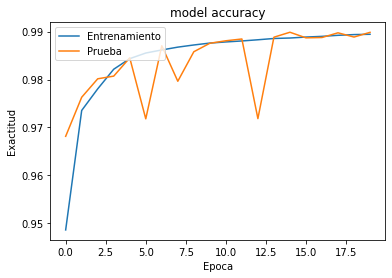

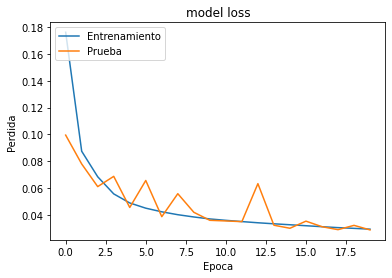

In [ ]:

# resumir la historia para la exactitud
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Exactitud')
plt.xlabel('Epoca')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()
# resumir la historia para la pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Perdida')
plt.xlabel('Epoca')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

In [ ]:
#  Prototipo de red neuronal profunda para la detección y prevención de ataques e intrusiones; tensorflow 2.3.0
#def redneuronal(X_entrenamiento, X_prueba, y_entrenamiento, y_prueba):
from datetime import datetime
%load_ext tensorboard
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
with tf.device('/device:GPU:0'):
  tf.keras.backend.set_floatx('float64')
  modelo = tf.keras.models.Sequential([
                                      #tf.keras.layers.Dense(78,activation=tf.nn.relu),
                                      #tf.keras.layers.Dense(78,activation=tf.keras.activations.relu),
                                      
                                      #tf.keras.layers.Dense(78,activation=tf.keras.activations.relu),
                                      
                                      #tf.keras.layers.Dense(78,activation=tf.keras.activations.relu),
                                  
                                      tf.keras.layers.Dense(130,activation=tf.keras.activations.relu),
                                    
                                      tf.keras.layers.Dense(83,activation=tf.keras.activations.relu),
                                     
                                      tf.keras.layers.Dense(78,activation=tf.nn.softmax) #use_bias=True
])
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer= tf.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Nadam'), metrics=['accuracy'])
  #history = modelo.fit(X_entrenamiento,y_entrenamiento,validation_data=(X_prueba,y_prueba),batch_size=200,callbacks=[tensorboard_callback],verbose=1,epochs=20,use_multiprocessing=True)
  history = modelo.fit(X_entrenamiento,y_entrenamiento,validation_split=0.2,batch_size=200,callbacks=[tensorboard_callback],verbose=1,epochs=10,use_multiprocessing=True)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/10
9490/9490 [==============================] - 44s 5ms/step - loss: 0.1685 - accuracy: 0.9503 - val_loss: 0.0999 - val_accuracy: 0.9695
Epoch 2/10
9490/9490 [==============================] - 44s 5ms/step - loss: 0.0878 - accuracy: 0.9733 - val_loss: 0.0792 - val_accuracy: 0.9766
Epoch 3/10
9490/9490 [==============================] - 44s 5ms/step - loss: 0.0710 - accuracy: 0.9777 - val_loss: 0.0644 - val_accuracy: 0.9795
Epoch 4/10
9490/9490 [==============================] - 44s 5ms/step - loss: 0.0595 - accuracy: 0.9807 - val_loss: 0.0534 - val_accuracy: 0.9814
Epoch 5/10
9490/9490 [==============================] - 43s 5ms/step - loss: 0.0517 - accuracy: 0.9837 - val_loss: 0.0473 - val_accuracy: 0.9846
Epoch 6/10
9490/9490 [==============================] - 44s 5ms/step - loss: 0.0468 - accuracy: 0.9850 - val_loss: 0.0448 - val_accuracy: 0.9859
Epoch 7/10
9490/9490 [==================

In [ ]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


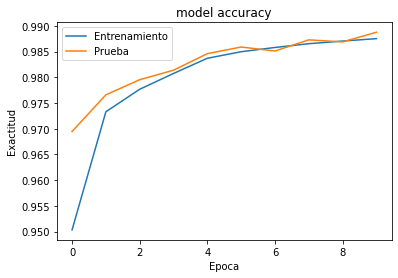

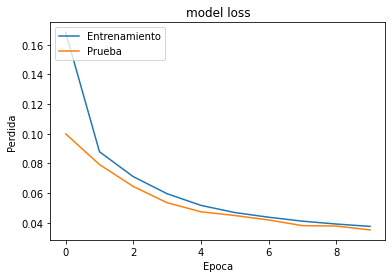

In [ ]:
# resumir la historia para la exactitud
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Exactitud')
plt.xlabel('Epoca')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()
# resumir la historia para la pérdida
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Perdida')
plt.xlabel('Epoca')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

In [ ]:
Tf_clase_predicha = modelo.predict(X_entrenamiento)
predicion_1 = np.argmax(Tf_clase_predicha ,axis=1) 
print(predicion_1)

74134/74134 [==============================] - 92s 1ms/step
[0 0 0 ... 0 3 0]


In [ ]:
Tf_clase_predicha1 = modelo.predict(X_prueba)
predicion_2 = np.argmax(Tf_clase_predicha1 ,axis=1) 
print(predicion_2)

18534/18534 [==============================] - 24s 1ms/step
[3 0 0 ... 3 1 4]


#Metricas red neuronal profunda en fase de entrenamiento

#Puntaje de clasificación de la Exactitud

---



In [ ]:
puntaje = metrics.accuracy_score(y_entrenamiento, predicion_1)
print("Puntaje de clasificación de Exactitud: {}".format(puntaje))

Puntaje de clasificación de Exactitud: 0.9887297582689961


#Métrica F1 score

In [ ]:
from sklearn.metrics import f1_score
print('Evaluacion de la metrica F1 score: %.2f' % f1_score(y_entrenamiento,predicion_1 , average='micro'))

Evaluacion de la metrica F1 score: 0.99


#Métrica de puntaje de precisión

In [ ]:
puntaje_presicion = metrics.precision_score(y_entrenamiento, predicion_1, average= "weighted")
print("Puntaje de precision: {}".format(puntaje_presicion))

Puntaje de precision: 0.989325936730539


#Sensibilidad

In [ ]:
sensibilidad = metrics.recall_score(y_entrenamiento,predicion_1, average= "weighted")
print("sensibilidad: {}".format(sensibilidad))

sensibilidad: 0.9887297582689961


#Metricas red neuronal profunda en fase de prueba

In [ ]:
puntaje = metrics.accuracy_score(y_prueba, predicion_2)
print("Puntaje de clasificación de Exactitud: {}".format(puntaje))

Puntaje de clasificación de Exactitud: 0.988696049518857


In [ ]:
from sklearn.metrics import f1_score
print('Evaluacion de la metrica F1 score: %.2f' % f1_score(y_prueba, predicion_2 , average='micro'))

Evaluacion de la metrica F1 score: 0.99


In [ ]:
puntaje_presicion = metrics.precision_score(y_prueba, predicion_2, average= "weighted")
print("Puntaje de precision: {}".format(puntaje_presicion))

Puntaje de precision: 0.9892705837984329


In [ ]:
sensibilidad = metrics.recall_score(y_prueba, predicion_2, average= "weighted")
print("sensibilidad: {}".format(sensibilidad))

sensibilidad: 0.988696049518857


#Reporte de clasificación de red neuronal profunda en fase de entrenamiento

In [ ]:
print(metrics.classification_report(y_entrenamiento,predicion_1, digits = 4,target_names=etiqueta))

                  precision    recall  f1-score   support

          BENIGN     0.9970    0.9949    0.9960   1830889
            DDoS     0.9895    0.9923    0.9909    217046
   DoS GoldenEye     0.9465    0.9703    0.9583     32319
        DoS Hulk     0.9702    0.9833    0.9767    231026
DoS Slowhttptest     0.7051    0.9095    0.7944     20589
   DoS slowloris     0.9291    0.7741    0.8445     40396

        accuracy                         0.9887   2372265
       macro avg     0.9229    0.9374    0.9268   2372265
    weighted avg     0.9893    0.9887    0.9888   2372265



# Reporte de clasificacion red neuronal profunda en fase de prueba

In [ ]:
print(metrics.classification_report(y_prueba, predicion_2, digits = 4,target_names=etiqueta))

                  precision    recall  f1-score   support

          BENIGN     0.9969    0.9950    0.9960    456983
            DDoS     0.9906    0.9925    0.9916     54821
   DoS GoldenEye     0.9500    0.9710    0.9604      8058
        DoS Hulk     0.9701    0.9834    0.9767     57933
DoS Slowhttptest     0.7039    0.9039    0.7915      5192
   DoS slowloris     0.9251    0.7695    0.8402     10080

        accuracy                         0.9887    593067
       macro avg     0.9228    0.9359    0.9260    593067
    weighted avg     0.9893    0.9887    0.9887    593067



#Librería para matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
matc=confusion_matrix(y_entrenamiento,predicion_1)

#Matriz de confusión de la Red Neuronal Profunda

---



In [ ]:
df2 = cicids['Label']
feat = df2.values
label = df2.unique()
label

array(['BENIGN', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
       'DoS slowloris'], dtype=object)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.figure(figsize=(15,15))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

#Matriz de confusion Red neuronal profunda fase de entrenamiento

Confusion matrix, without normalization
[[1821612    1370     670    6394     565     278]
 [    422  215382     739     368       2     133]
 [    589       3   31359      39     104     225]
 [   1849     814      66  227179      79    1039]
 [   1017      86      25      23   18726     712]
 [   1599      19     271     154    7082   31271]]


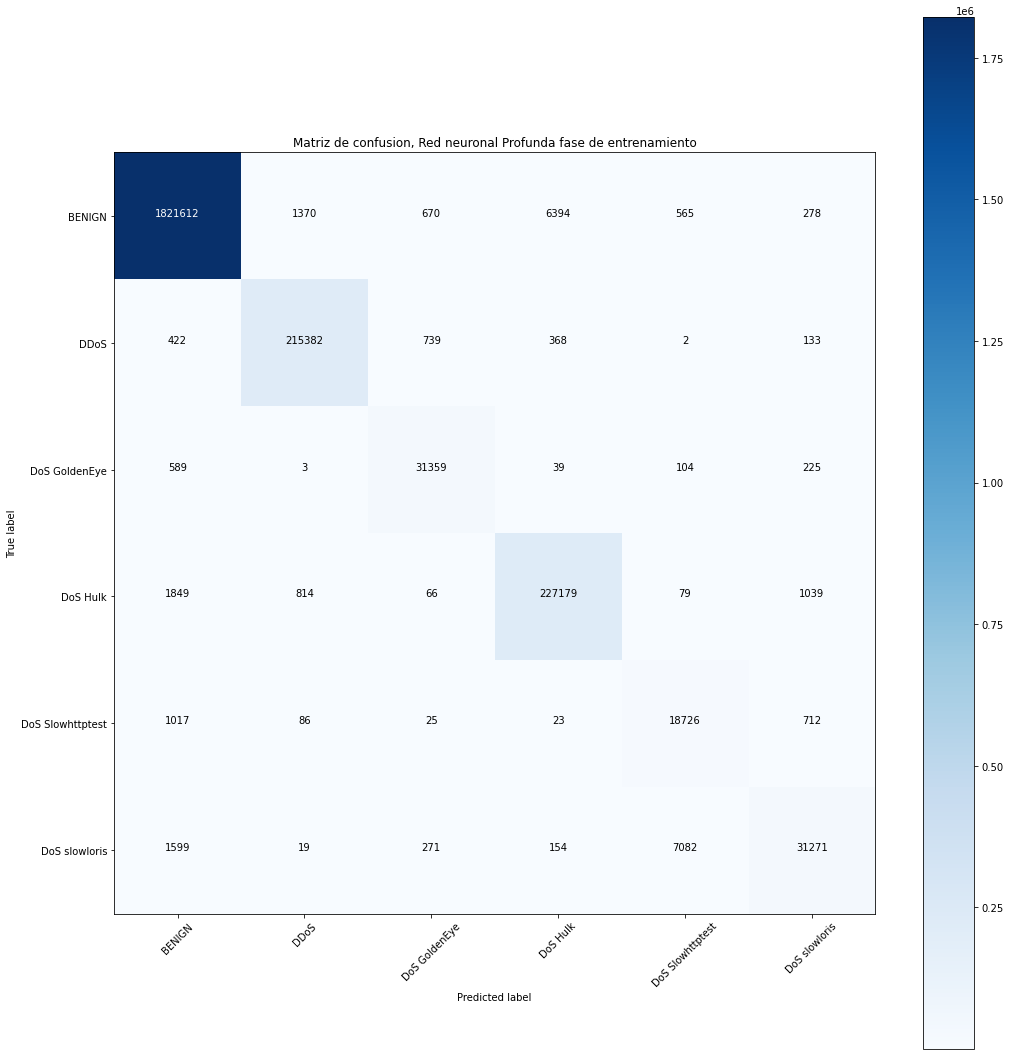

In [ ]:

cnf_matrix = confusion_matrix(y_entrenamiento,predicion_1,labels=[0,1,2,3,4,5])
np.set_printoptions(precision=2)


plot_confusion_matrix(cnf_matrix, classes=label,title='Matriz de confusion, Red neuronal Profunda fase de entrenamiento')

#Matriz de confusion red neuronal profunda en fase de prueba

Confusion matrix, without normalization
[[454704    307    157   1616    134     65]
 [   115  54412    176     85      0     33]
 [   148      1   7824      7     27     51]
 [   455    180     16  56973     23    286]
 [   269     26      6      5   4693    193]
 [   432      3     57     41   1790   7757]]


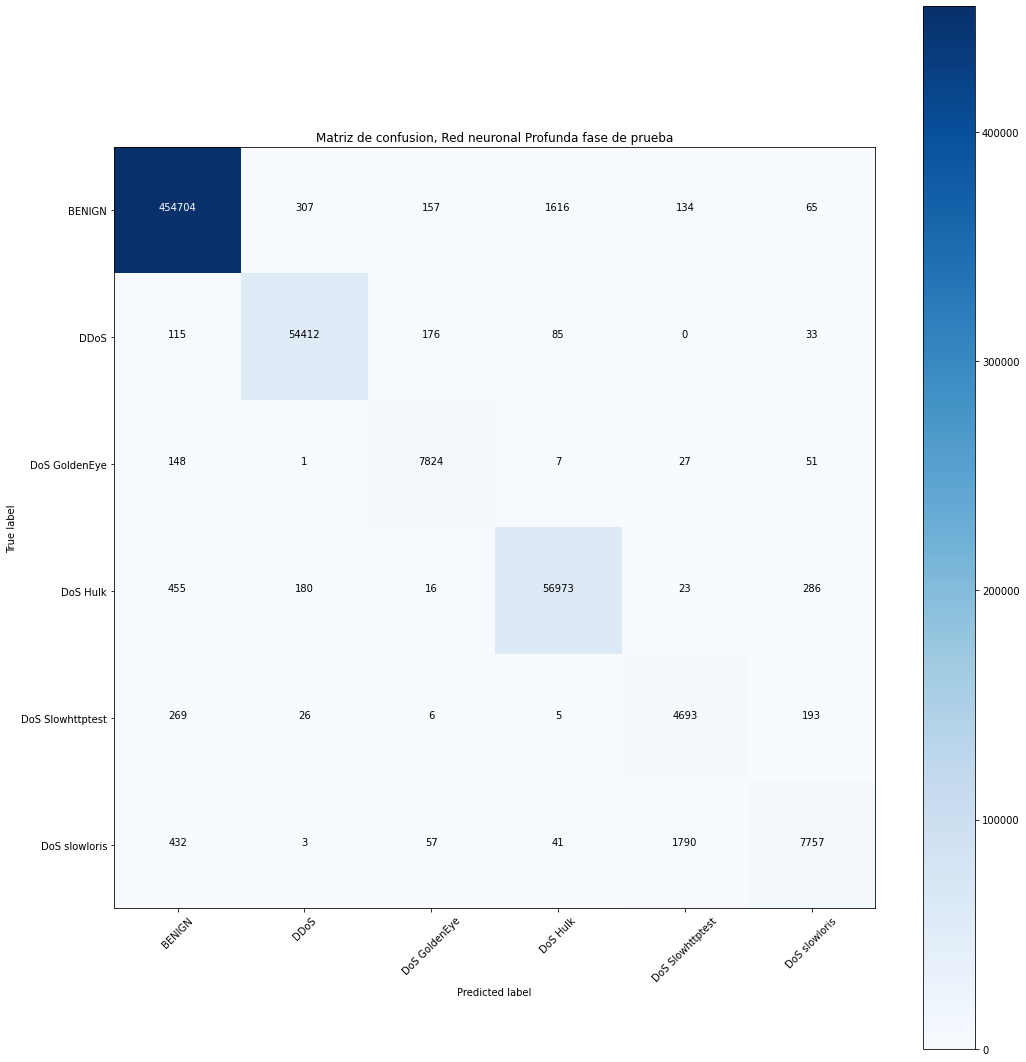

In [ ]:
cnf_matrix = confusion_matrix(y_prueba, predicion_2,labels=[0,1,2,3,4,5])
np.set_printoptions(precision=2)


plot_confusion_matrix(cnf_matrix, classes=label,title='Matriz de confusion, Red neuronal Profunda fase de prueba')

#Curva ROC de la Red neuronal profunda en fase de entrenamiento 

---



In [ ]:
keras.__version__

'2.9.0'

64867/64867 [==============================] - 82s 1ms/step


<ipython-input-47-92c7d3826481>:31: MatplotlibDeprecationWarning: Unrecognized location 'inferior derecha'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc="inferior derecha")


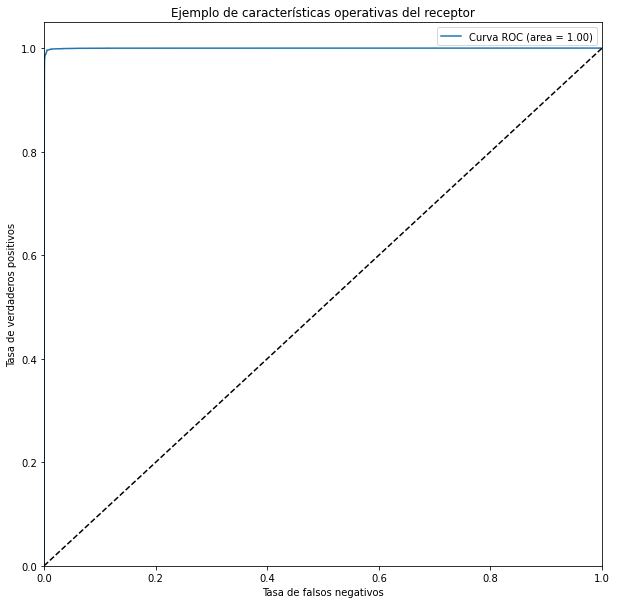

<ipython-input-47-92c7d3826481>:49: MatplotlibDeprecationWarning: Unrecognized location 'inferior derecha'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc="inferior derecha")


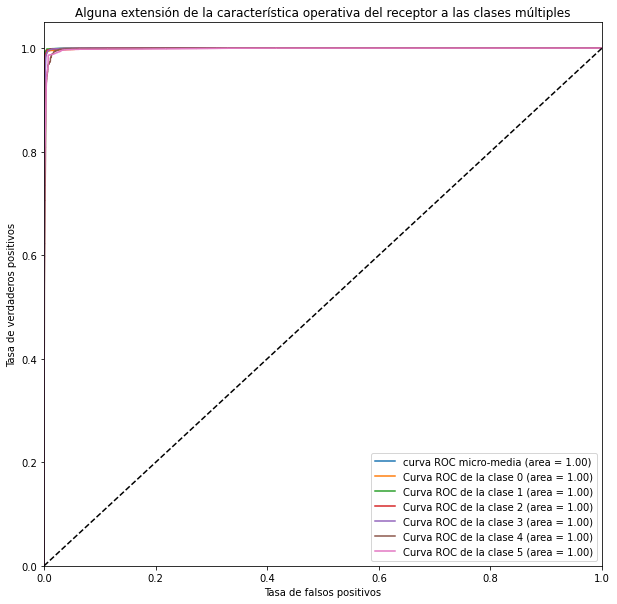

In [ ]:
# Binarizar la salida
ydnn = label_binarize(Y, classes=[0,1,2,3,4,5])
n_classes = ydnn.shape[1]

# barajar y dividir los conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, ydnn, test_size=0.3)

Tf_clase_predictpr = modelo.predict(X_entrenamiento)

# Calcular la curva ROC y el área ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_entrenamiento[:, i], Tf_clase_predictpr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular la curva ROC micro-media y el área ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_entrenamiento.ravel(), Tf_clase_predictpr[:,:6].ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Gráfico de una curva ROC para una clase específica
plt.figure(figsize=(10,10))
plt.plot(fpr[2], tpr[2], label='Curva ROC (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos negativos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Ejemplo de características operativas del receptor')
plt.legend(loc="inferior derecha")
plt.show()

# Trazado de la curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='curva ROC micro-media (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Curva ROC de la clase {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Alguna extensión de la característica operativa del receptor a las clases múltiples')
plt.legend(loc="inferior derecha")
plt.show()

# Curva ROC de la Red neuronal profunda en fase de prueba

---



27800/27800 [==============================] - 38s 1ms/step


<ipython-input-48-8036aa991d09>:31: MatplotlibDeprecationWarning: Unrecognized location 'inferior derecha'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc="inferior derecha")


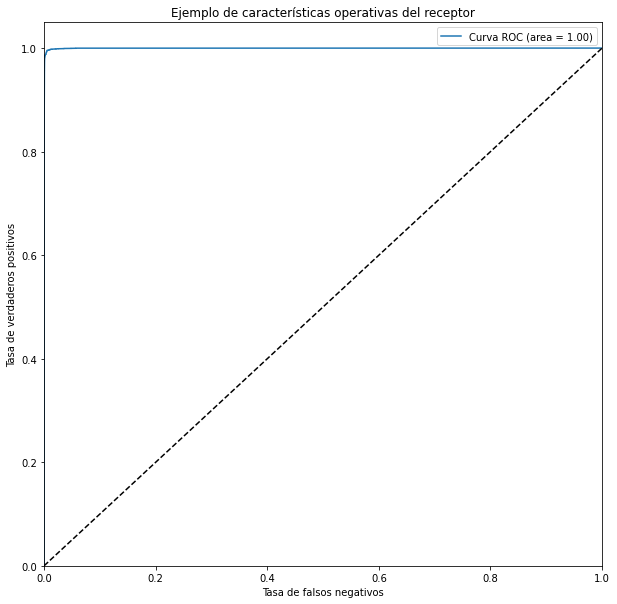

<ipython-input-48-8036aa991d09>:49: MatplotlibDeprecationWarning: Unrecognized location 'inferior derecha'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc="inferior derecha")


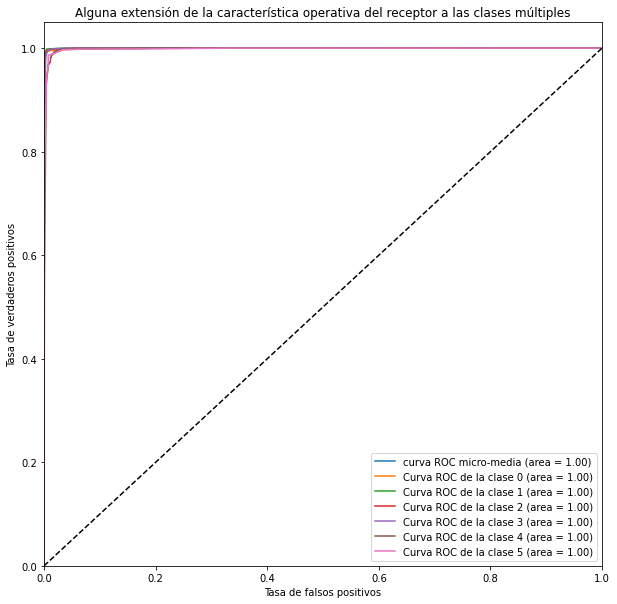

In [ ]:
# Binarizar la salida
ydnn = label_binarize(Y, classes=[0,1,2,3,4,5])
n_classes = ydnn.shape[1]

# barajar y dividir los conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, ydnn, test_size=0.3)

Tf_clase_predictpro = modelo.predict(X_prueba)

# Calcular la curva ROC y el área ROC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):  
    fpr[i], tpr[i], _ = roc_curve(y_prueba[:, i], Tf_clase_predictpro[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Calcular la curva ROC micro-media y el área ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_prueba.ravel(), Tf_clase_predictpro[:,:6].ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Gráfico de una curva ROC para una clase específica
plt.figure(figsize=(10,10))
plt.plot(fpr[2], tpr[2], label='Curva ROC (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos negativos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Ejemplo de características operativas del receptor')
plt.legend(loc="inferior derecha")
plt.show()

# Trazado de la curva ROC
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='curva ROC micro-media (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='Curva ROC de la clase {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Alguna extensión de la característica operativa del receptor a las clases múltiples')
plt.legend(loc="inferior derecha")
plt.show()

In [ ]:
cicids.groupby('Label').size()

Label
BENIGN              2287872
DDoS                 271867
DoS GoldenEye         40377
DoS Hulk             288959
DoS Slowhttptest      25781
DoS slowloris         50476
dtype: int64

#Visualización del diagrama de la red neuronal profunda

---



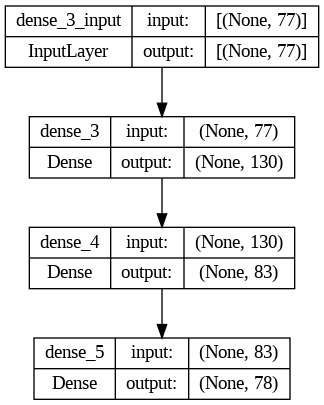

In [ ]:
tf.keras.utils.plot_model(modelo, show_shapes=True)

# Lectura del modelo y prediccion

In [ ]:
modelo.save("/content/drive/MyDrive/Colab Notebooks/MachineLearningCVE/redneuronal_ver_Enero.h5")

In [ ]:
new_model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/MachineLearningCVE/redneuronal_ver_Enero.h5')

In [ ]:
prueba=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/captura Ddos/20221212-154833.pcap.csv")

In [ ]:
prueba=prueba.reindex(columns=['dst_port','flow_duration','tot_fwd_pkts','tot_bwd_pkts','totlen_fwd_pkts','totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min','fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max','bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std','flow_byts_s','flow_pkts_s','flow_iat_mean','flow_iat_std','flow_iat_max','flow_iat_min','fwd_iat_tot','fwd_iat_mean', 'fwd_iat_std','fwd_iat_max', 'fwd_iat_min','bwd_iat_tot','bwd_iat_mean','bwd_iat_std','bwd_iat_max','bwd_iat_min','fwd_psh_flags','bwd_psh_flags','fwd_urg_flags', 'bwd_urg_flags','fwd_header_len', 'bwd_header_len','fwd_pkts_s','bwd_pkts_s','pkt_len_min','pkt_len_max','pkt_len_mean', 'pkt_len_std', 'pkt_len_var','fin_flag_cnt','syn_flag_cnt','rst_flag_cnt', 'psh_flag_cnt', 'ack_flag_cnt','urg_flag_cnt','cwe_flag_count','ece_flag_cnt', 'down_up_ratio', 'pkt_size_avg','fwd_seg_size_avg', 'bwd_seg_size_avg','fwd_byts_b_avg', 'fwd_pkts_b_avg','fwd_blk_rate_avg','bwd_byts_b_avg','bwd_pkts_b_avg','bwd_blk_rate_avg','subflow_fwd_pkts','subflow_fwd_byts','subflow_bwd_pkts','subflow_bwd_byts','init_fwd_win_byts', 'init_bwd_win_byts','fwd_act_data_pkts','fwd_seg_size_min','active_mean','active_std','active_max', 'active_min','idle_mean','idle_std','idle_max', 'idle_min'])
prueba = prueba.replace([np.inf,-np.inf],0)
prueba = prueba.values
norm= pd.DataFrame(normalize(prueba))

In [ ]:
prediccion = np.argmax(new_model.predict(norm),axis=1)

80/80 [==============================] - 0s 1ms/step


In [ ]:
def prediccion(norm):
  return np.argmax(new_model.predict(norm),axis=1)

In [ ]:
prediccion(norm[:500])

16/16 [==============================] - 0s 2ms/step


array([1, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(["BENIGN", "DDoS", "DoS GoldenEye","DoS Hulk","DoS Slowhttptest","DoS slowloris"])
LabelEncoder()
ññ=le.inverse_transform(prediccion(norm))
ññ

80/80 [==============================] - 0s 4ms/step


array(['DDoS', 'DoS slowloris', 'DoS slowloris', ..., 'BENIGN', 'BENIGN',
       'BENIGN'], dtype='<U16')

In [ ]:
yu=pd.DataFrame(ññ)

In [ ]:
yu.rename({0: 'Total'}, axis=1,inplace=True)

In [ ]:
yu.value_counts().shape[0]

6

In [ ]:
yu

,Total
0,DDoS
1,DoS slowloris
2,DoS slowloris
3,BENIGN
4,BENIGN
...,...
2534,BENIGN
2535,BENIGN
2536,BENIGN
2537,BENIGN


In [ ]:
yu.groupby('Total').size()

Total
BENIGN              2463
DDoS                  16
DoS GoldenEye          5
DoS Hulk              36
DoS Slowhttptest       5
DoS slowloris         14
dtype: int64

In [ ]:
print('Registros :',yu.shape[0],' ',yu.groupby('Total').size())

Registros : 2539   Total
BENIGN              2463
DDoS                  16
DoS GoldenEye          5
DoS Hulk              36
DoS Slowhttptest       5
DoS slowloris         14
dtype: int64


In [ ]:
import seaborn as sns

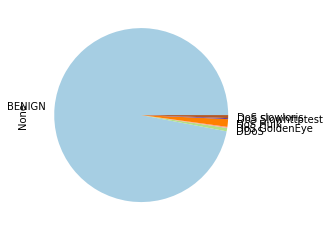

In [ ]:
yu.groupby('Total').size().plot(kind='pie',cmap='Paired')


In [ ]:
yu.groupby('Total').size()

Total
BENIGN              2463
DDoS                  16
DoS GoldenEye          5
DoS Hulk              36
DoS Slowhttptest       5
DoS slowloris         14
dtype: int64

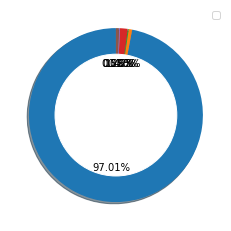

In [ ]:
# library
import matplotlib.pyplot as plt

# create data
#size_of_groups=[12,11,3,30]
label1=['BENIGN','DDoS','DoS GoldenEye','DoS Hulk','DoS Slowhttptest','DoS slowloris']
label2=list(label1)
# Create a pieplot
plt.pie(yu.groupby('Total').size(), explode=None, autopct='%.2f%%', shadow=True, startangle=90)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()#autopct='%.2f%%'